In [1]:
library(Seurat)
library(Signac)

Attaching SeuratObject

Attaching sp



In [2]:
library(EnsDb.Hsapiens.v86)
library(dplyr)
library(ggplot2)

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked from ‘package:s

In [3]:
getwd() 

[1] "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/celltype_annotation_tutorial/notebooks"

In [4]:
setwd("/mnt/ibm_lg/alejandro/neurIPS/cell_annotation_paper/")

In [5]:
inputdata.10x <- Read10X_h5("/mnt/ibm_lg/alejandro/neurIPS/cell_annotation_paper/data/filtered_feature_bc_matrix.h5")

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [6]:
rna_counts <- inputdata.10x$`Gene Expression`
atac_counts <- inputdata.10x$Peaks

In [7]:
rna_counts[1:4,1:4]

4 x 4 sparse Matrix of class "dgCMatrix"
            AAACAGCCAATTAAGG-1 AAACAGCCAGGCTGTT-1 AAACATGCAAAGCGCA-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
            AAACATGCAATAACCT-1
MIR1302-2HG                  .
FAM138A                      .
OR4F5                        .
AL627309.1                   .

In [8]:
atac_counts[1:4,1:4]

4 x 4 sparse Matrix of class "dgCMatrix"
                   AAACAGCCAATTAAGG-1 AAACAGCCAGGCTGTT-1 AAACATGCAAAGCGCA-1
chr1:9805-10691                     .                  .                  .
chr1:180722-181000                  .                  .                  .
chr1:181113-181805                  .                  .                  .
chr1:191160-192062                  .                  .                  .
                   AAACATGCAATAACCT-1
chr1:9805-10691                     .
chr1:180722-181000                  .
chr1:181113-181805                  .
chr1:191160-192062                  .

In [9]:
# Create Seurat object
pbmc <- CreateSeuratObject(counts = rna_counts)
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [10]:
# Now add in the ATAC-seq data
# we'll only use peaks in standard chromosomes
grange.counts <- StringToGRanges(rownames(atac_counts), sep = c(":", "-"))
grange.use <- seqnames(grange.counts) %in% standardChromosomes(grange.counts)
atac_counts <- atac_counts[as.vector(grange.use), ]
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations) <- "hg38"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [11]:
frag.file <- "/mnt/ibm_lg/alejandro/neurIPS/cell_annotation_paper/data/atac_fragments.tsv.gz"
chrom_assay <- CreateChromatinAssay(
   counts = atac_counts,
   sep = c(":", "-"),
   genome = 'hg38',
   fragments = frag.file,
   min.cells = 10,
   annotation = annotations
 )
pbmc[["ATAC"]] <- chrom_assay

Computing hash



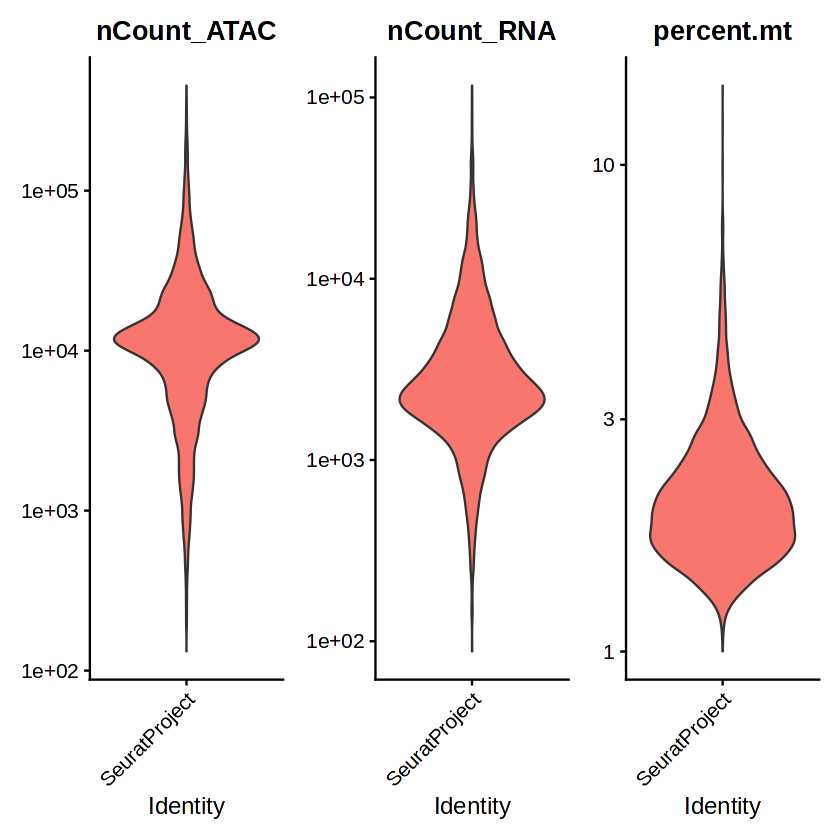

In [12]:
VlnPlot(pbmc, features = c("nCount_ATAC", "nCount_RNA","percent.mt"), ncol = 3,
  log = TRUE, pt.size = 0) + NoLegend()

In [13]:
meta = read.csv('/mnt/ibm_lg/alejandro/neurIPS/cell_annotation_paper/data/metadata.csv')
row.names(meta) <- meta$X

In [14]:
meta

,X,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,⋯,nucleosome_signal,rna_ann,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
AAACAGCCAATTAAGG-1,AAACAGCCAATTAAGG-1,1088,1.0578718,1607,1088,0.4751749,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,⋯,0.6885246,CD4+ T naive,CD4+ T naive,CD4+ T naive,0,5,CD4+T,T_cells,0,3
AAACAGCCAGGCTGTT-1,AAACAGCCAGGCTGTT-1,2663,2.4925647,7061,2663,1.8318003,G2M,Lymph prog,Lymph prog,Lymph prog,⋯,0.9993252,Lymph prog,Lymph prog,Lymph prog,7,8,Lymph_prog,unassigned,6,9
AAACATGCAAAGCGCA-1,AAACATGCAAAGCGCA-1,1162,0.7786429,1798,1162,0.5871742,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,⋯,1.1462141,CD4+ T naive,CD4+ T naive,CD4+ T activated,0,1,CD4+T,T_cells,0,7
AAACATGCAATAACCT-1,AAACATGCAATAACCT-1,1224,0.7076350,2685,1224,0.5724250,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,⋯,0.9327884,Erythroblast,Erythroblast,"Proerythroblast, Erythroblast",2,2,unassigned,unassigned,2,1
AAACATGCAATAATGG-1,AAACATGCAATAATGG-1,987,1.2517385,1438,987,0.4134888,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,⋯,0.7079137,CD8+ T,CD8+ T,"CD4+ T activated, CD8+ T",3,3,CD8+T,T_cells,0,2
AAACATGCAATATAGG-1,AAACATGCAATATAGG-1,1084,0.5171300,1547,1084,0.5075861,S,CD4+ T activated,CD4+ T activated,CD4+ T activated,⋯,1.0549872,CD4+ T activated,CD4+ T activated,CD4+ T activated,0,1,CD4+T,T_cells,0,7
AAACATGCACTAAGTT-1,AAACATGCACTAAGTT-1,2809,1.7691933,6161,2809,1.8419135,G2M,CD4+ T activated,CD4+ T activated,CD4+ T activated,⋯,0.9816893,CD4+ T activated,CD4+ T activated,CD4+ T activated,0,1,CD4+T,T_cells,0,8
AAACATGCAGTATGTT-1,AAACATGCAGTATGTT-1,1370,0.9098428,2418,1370,0.6944811,G2M,B1 B,Naive CD20+ B,naive CD20+ B,⋯,0.7274472,B1 B,B1 B,Naive CD20+ B,5,9,unassigned,unassigned,4,4
AAACCAACAATTAACC-1,AAACCAACAATTAACC-1,1557,0.4506350,2441,1557,0.8472400,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,⋯,0.8772688,CD4+ T naive,CD4+ T naive,CD4+ T naive,0,5,CD4+T,T_cells,0,8


In [15]:
meta %>% head() 

,X,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,⋯,nucleosome_signal,rna_ann,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
AAACAGCCAATTAAGG-1,AAACAGCCAATTAAGG-1,1088,1.0578718,1607,1088,0.4751749,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,⋯,0.6885246,CD4+ T naive,CD4+ T naive,CD4+ T naive,0,5,CD4+T,T_cells,0,3
AAACAGCCAGGCTGTT-1,AAACAGCCAGGCTGTT-1,2663,2.4925647,7061,2663,1.8318003,G2M,Lymph prog,Lymph prog,Lymph prog,⋯,0.9993252,Lymph prog,Lymph prog,Lymph prog,7,8,Lymph_prog,unassigned,6,9
AAACATGCAAAGCGCA-1,AAACATGCAAAGCGCA-1,1162,0.7786429,1798,1162,0.5871742,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,⋯,1.1462141,CD4+ T naive,CD4+ T naive,CD4+ T activated,0,1,CD4+T,T_cells,0,7
AAACATGCAATAACCT-1,AAACATGCAATAACCT-1,1224,0.7076350,2685,1224,0.5724250,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,⋯,0.9327884,Erythroblast,Erythroblast,"Proerythroblast, Erythroblast",2,2,unassigned,unassigned,2,1
AAACATGCAATAATGG-1,AAACATGCAATAATGG-1,987,1.2517385,1438,987,0.4134888,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,⋯,0.7079137,CD8+ T,CD8+ T,"CD4+ T activated, CD8+ T",3,3,CD8+T,T_cells,0,2
AAACATGCAATATAGG-1,AAACATGCAATATAGG-1,1084,0.5171300,1547,1084,0.5075861,S,CD4+ T activated,CD4+ T activated,CD4+ T activated,⋯,1.0549872,CD4+ T activated,CD4+ T activated,CD4+ T activated,0,1,CD4+T,T_cells,0,7


In [16]:
# QC with the cell_ids from the neurips final object
cell_ids<-rownames(meta)
pbmc <- subset(pbmc, cells = cell_ids)

In [18]:
pbmc

An object of class Seurat 
161077 features across 6224 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 other assay present: ATAC

In [19]:
# # QC with some basic QC metrics (number of counts, etc.)
# pbmc <- subset(
#   x = pbmc,
#   subset = nCount_ATAC < 7e4 &
#     nCount_ATAC > 3e3 &
#     nCount_RNA < 25000 &
#     nCount_RNA > 1000 &
#     percent.mt < 10
# )

In [19]:
# normalization, dimensionality reduction, and UMAP computing
# RNA analysis
DefaultAssay(pbmc) <- "RNA"
pbmc <- SCTransform(pbmc, verbose = FALSE) %>% 
                        RunPCA() %>% 
                        RunUMAP(dims = 1:50, reduction.name = 'umap.rna', reduction.key = 'rnaUMAP_')

# ATAC analysis
# We exclude the first dimension as this is typically correlated with sequencing depth
DefaultAssay(pbmc) <- "ATAC"
pbmc <- RunTFIDF(pbmc)
pbmc <- FindTopFeatures(pbmc, min.cutoff = 'q0')
pbmc <- RunSVD(pbmc)
pbmc <- RunUMAP(pbmc, reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "atacUMAP_")

PC_ 1 
Positive:  NAMPT, VCAN, ANXA1, B2M, SAT1, PLXDC2, DPYD, AOAH, LRMDA, ARHGAP26 
	   PTPRC, ACSL1, ARHGAP15, SLC8A1, SRGN, TNFAIP3, CD74, SAMSN1, CD83, HLA-B 
	   PLAUR, JUN, AFF3, PLCB1, LYN, IRAK3, CD69, FCN1, FOSB, PDE4D 
Negative:  HBA2, HBA1, SLC4A1, HBD, SLC25A37, SOX6, HBM, ANK1, HBB, RGS6 
	   CA1, SPTA1, SNCA, AHSP, SLC25A21, TSPAN5, CA2, HEMGN, CR1L, PRDX2 
	   BLVRB, ALAS2, TFRC, SPTB, NFIA, RHAG, CENPF, GYPB, TRAK2, HMBS 
PC_ 2 
Positive:  NAMPT, VCAN, PLXDC2, ACSL1, SLC8A1, LRMDA, ANXA1, PLAUR, SAT1, IRAK3 
	   FCN1, PID1, RBM47, IL1B, DMXL2, ARHGAP26, DPYD, SAMSN1, LRRK2, NEAT1 
	   FGD4, MCTP1, SOD2, NLRP3, TMTC2, CXCL8, RAB31, CSF3R, CLEC4E, THBS1 
Negative:  B2M, CD69, GNLY, CCL5, NKG7, SKAP1, BACH2, INPP4B, RPL3, CD247 
	   PRKCH, BCL11B, IL32, RPL13A, HLA-B, HLA-C, IL7R, RPS2, RPL13, LTB 
	   ARHGAP15, THEMIS, ANK3, CAMK4, SYNE2, RORA, CCL4, EEF1A1, RPS27A, RPL41 
PC_ 3 
Positive:  AFF3, BANK1, BACH2, IGHM, EBF1, RALGPS2, FCRL1, CD74, PAX5, COL19A1 
	   OSBPL10,

In [20]:
pbmc <- FindMultiModalNeighbors(pbmc, reduction.list = list("pca", "lsi"), dims.list = list(1:50, 2:40))
pbmc <- RunUMAP(pbmc, nn.name = "weighted.nn", n.neighbors = 30, 
                reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
pbmc <- FindClusters(pbmc, graph.name = "wsnn", algorithm = 4, verbose = FALSE)


Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

11:38:14 UMAP embedding parameters a = 0.9922 b = 1.112

11:38:15 Commencing smooth kNN distance calibration using 1 thread

11:38:18 Initializing from normalized Laplacian + noise

11:38:18 Commencing optimization for 500 epochs, with 182976 positive edges

11:38:26 Optimization finished

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("ret

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by coercion to integer range"
Warning message in paste("reticulate", module, "load", sep = "::"):
"NAs introduced by c

In [21]:
pbmc <- FindClusters (pbmc, graph.name = "wsnn", algorithm=4, verbose=FALSE)

In [24]:
pbmc

An object of class Seurat 
183057 features across 6224 samples within 3 assays 
Active assay: ATAC (124476 features, 124476 variable features)
 2 other assays present: RNA, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap

In [23]:
pbmc@meta.data %>% head() 

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.0.8,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>
AAACAGCCAATTAAGG-1,SeuratProject,1832,1204,1.0371179,8256,3811,1994,1203,0.4775704,0.5224296,3,3
AAACAGCCAGGCTGTT-1,SeuratProject,8032,2917,2.3904382,19866,8519,2297,1113,0.5792240,0.4207760,10,10
AAACATGCAAAGCGCA-1,SeuratProject,2123,1307,0.8007537,10646,4974,2142,1304,0.5806327,0.4193673,4,4
AAACATGCAATAACCT-1,SeuratProject,3088,1355,0.7448187,22412,8116,2704,1354,0.4004532,0.5995468,1,1
AAACATGCAATAATGG-1,SeuratProject,1604,1081,1.1221945,9012,4163,1930,1078,0.4450565,0.5549435,2,2
AAACATGCAATATAGG-1,SeuratProject,1808,1214,0.4977876,10913,4883,1978,1214,0.7172909,0.2827091,4,4


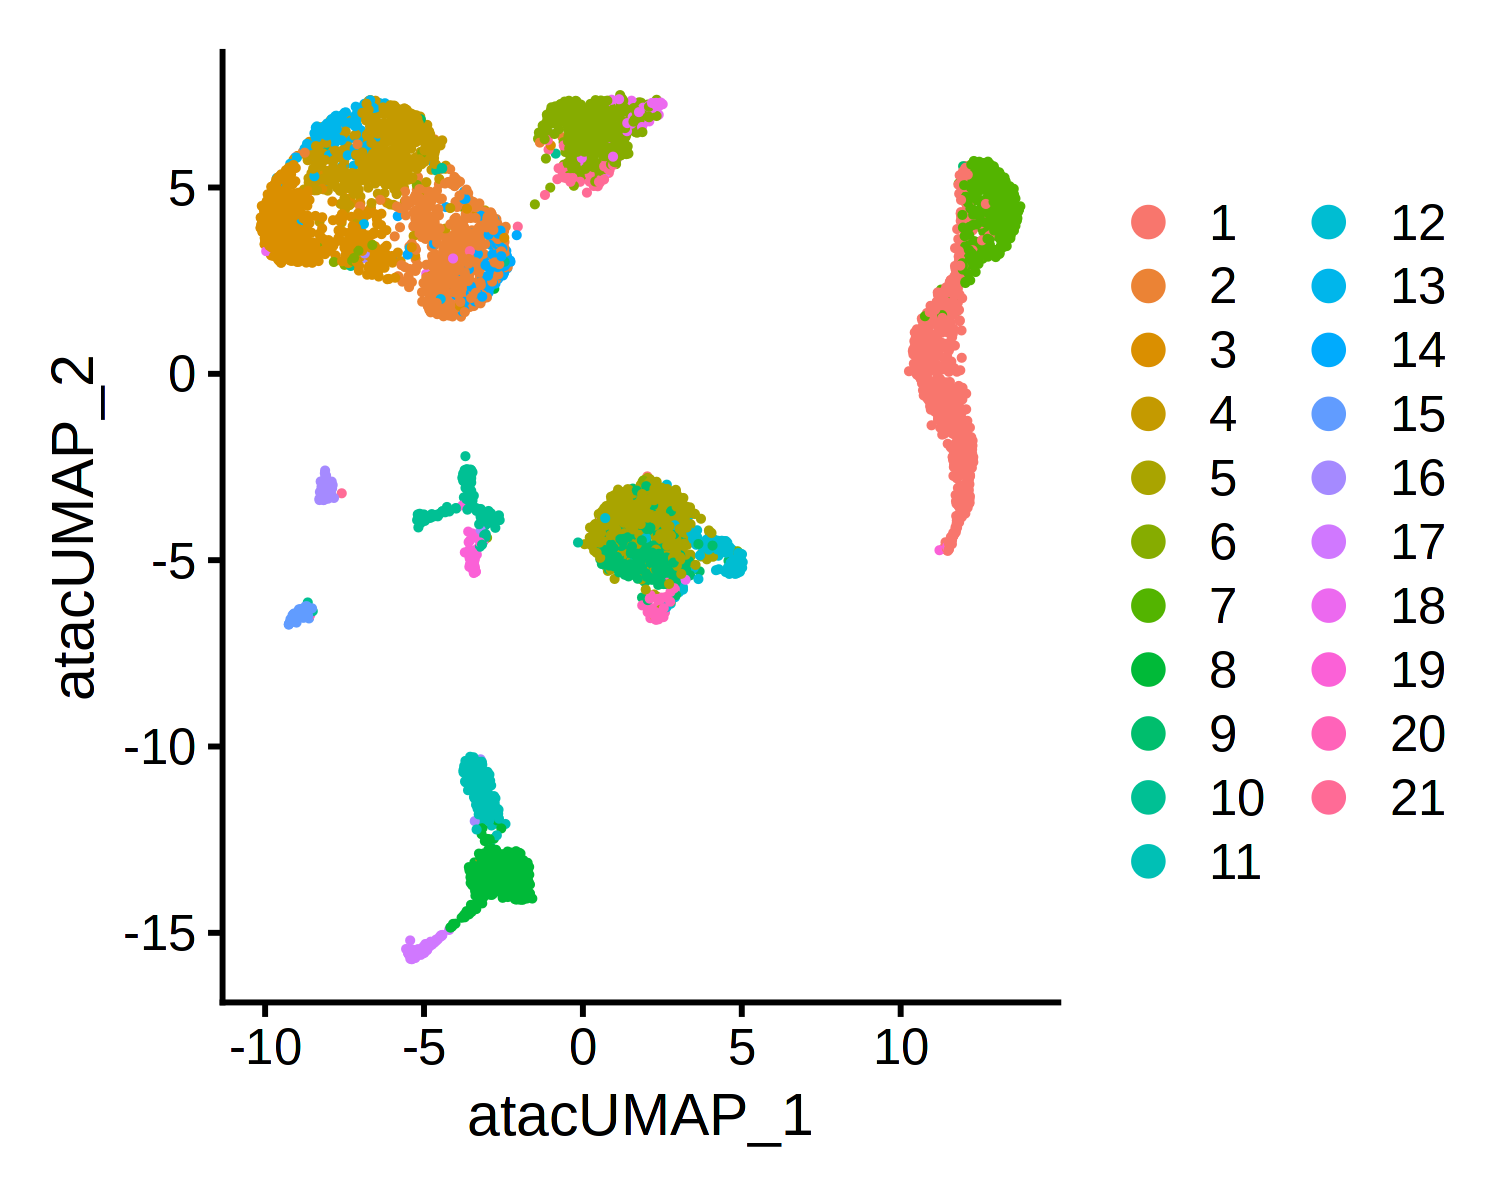

In [25]:
options(repr.plot.width=5, repr.plot.height=4)
options(repr.plot.res=300)
DimPlot(pbmc)

In [27]:
meta = read.csv('/mnt/ibm_lg/alejandro/neurIPS/cell_annotation_paper/data/metadata.csv')
row.names(meta) <- meta$X

In [28]:
meta %>% head() 

,X,n_genes_by_counts,pct_counts_mt,n_counts,n_genes,size_factors,phase,leiden_final,atac_ann,cell_type,⋯,nucleosome_signal,rna_ann,cell_type_RNA,cell_type_ATAC,GEX_leiden_015,ATAC_leiden_015,manual_annotation_fine,manual_annotation_coarse,joint_leiden_015,joint_leiden_05
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
AAACAGCCAATTAAGG-1,AAACAGCCAATTAAGG-1,1088,1.0578718,1607,1088,0.4751749,G2M,CD4+ T naive,CD4+ T naive,CD4+ T naive,⋯,0.6885246,CD4+ T naive,CD4+ T naive,CD4+ T naive,0,5,CD4+T,T_cells,0,3
AAACAGCCAGGCTGTT-1,AAACAGCCAGGCTGTT-1,2663,2.4925647,7061,2663,1.8318003,G2M,Lymph prog,Lymph prog,Lymph prog,⋯,0.9993252,Lymph prog,Lymph prog,Lymph prog,7,8,Lymph_prog,unassigned,6,9
AAACATGCAAAGCGCA-1,AAACATGCAAAGCGCA-1,1162,0.7786429,1798,1162,0.5871742,G2M,CD4+ T naive,CD4+ T activated,CD4+ T activated,⋯,1.1462141,CD4+ T naive,CD4+ T naive,CD4+ T activated,0,1,CD4+T,T_cells,0,7
AAACATGCAATAACCT-1,AAACATGCAATAACCT-1,1224,0.7076350,2685,1224,0.5724250,G2M,Erythroblast,"Proerythroblast, Erythroblast",Erythroblast,⋯,0.9327884,Erythroblast,Erythroblast,"Proerythroblast, Erythroblast",2,2,unassigned,unassigned,2,1
AAACATGCAATAATGG-1,AAACATGCAATAATGG-1,987,1.2517385,1438,987,0.4134888,S,CD8+ T,"CD4+ T activated, CD8+ T",CD8+ T,⋯,0.7079137,CD8+ T,CD8+ T,"CD4+ T activated, CD8+ T",3,3,CD8+T,T_cells,0,2
AAACATGCAATATAGG-1,AAACATGCAATATAGG-1,1084,0.5171300,1547,1084,0.5075861,S,CD4+ T activated,CD4+ T activated,CD4+ T activated,⋯,1.0549872,CD4+ T activated,CD4+ T activated,CD4+ T activated,0,1,CD4+T,T_cells,0,7


In [29]:
# filter for the cells that passed the neurips QC
common_cells <- intersect(colnames(pbmc),row.names(meta))

In [30]:
pbmc <- AddMetaData(pbmc, metadata = meta[common_cells,])

In [31]:
names(pbmc@meta.data)

[1] "orig.ident"               "nCount_RNA"              
 [3] "nFeature_RNA"             "percent.mt"              
 [5] "nCount_ATAC"              "nFeature_ATAC"           
 [7] "nCount_SCT"               "nFeature_SCT"            
 [9] "SCT.weight"               "ATAC.weight"             
[11] "wsnn_res.0.8"             "seurat_clusters"         
[13] "X"                        "n_genes_by_counts"       
[15] "pct_counts_mt"            "n_counts"                
[17] "n_genes"                  "size_factors"            
[19] "phase"                    "leiden_final"            
[21] "atac_ann"                 "cell_type"               
[23] "nCount_peaks"             "atac_fragments"          
[25] "reads_in_peaks_frac"      "blacklist_fraction"      
[27] "nucleosome_signal"        "rna_ann"                 
[29] "cell_type_RNA"            "cell_type_ATAC"          
[31] "GEX_leiden_015"           "ATAC_leiden_015"         
[33] "manual_annotation_fine"   "manual_annotation_coarse"
[35] "joint_leiden_015"         "joint_leiden_05"

In [32]:
pbmc

An object of class Seurat 
183057 features across 6224 samples within 3 assays 
Active assay: ATAC (124476 features, 124476 variable features)
 2 other assays present: RNA, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap

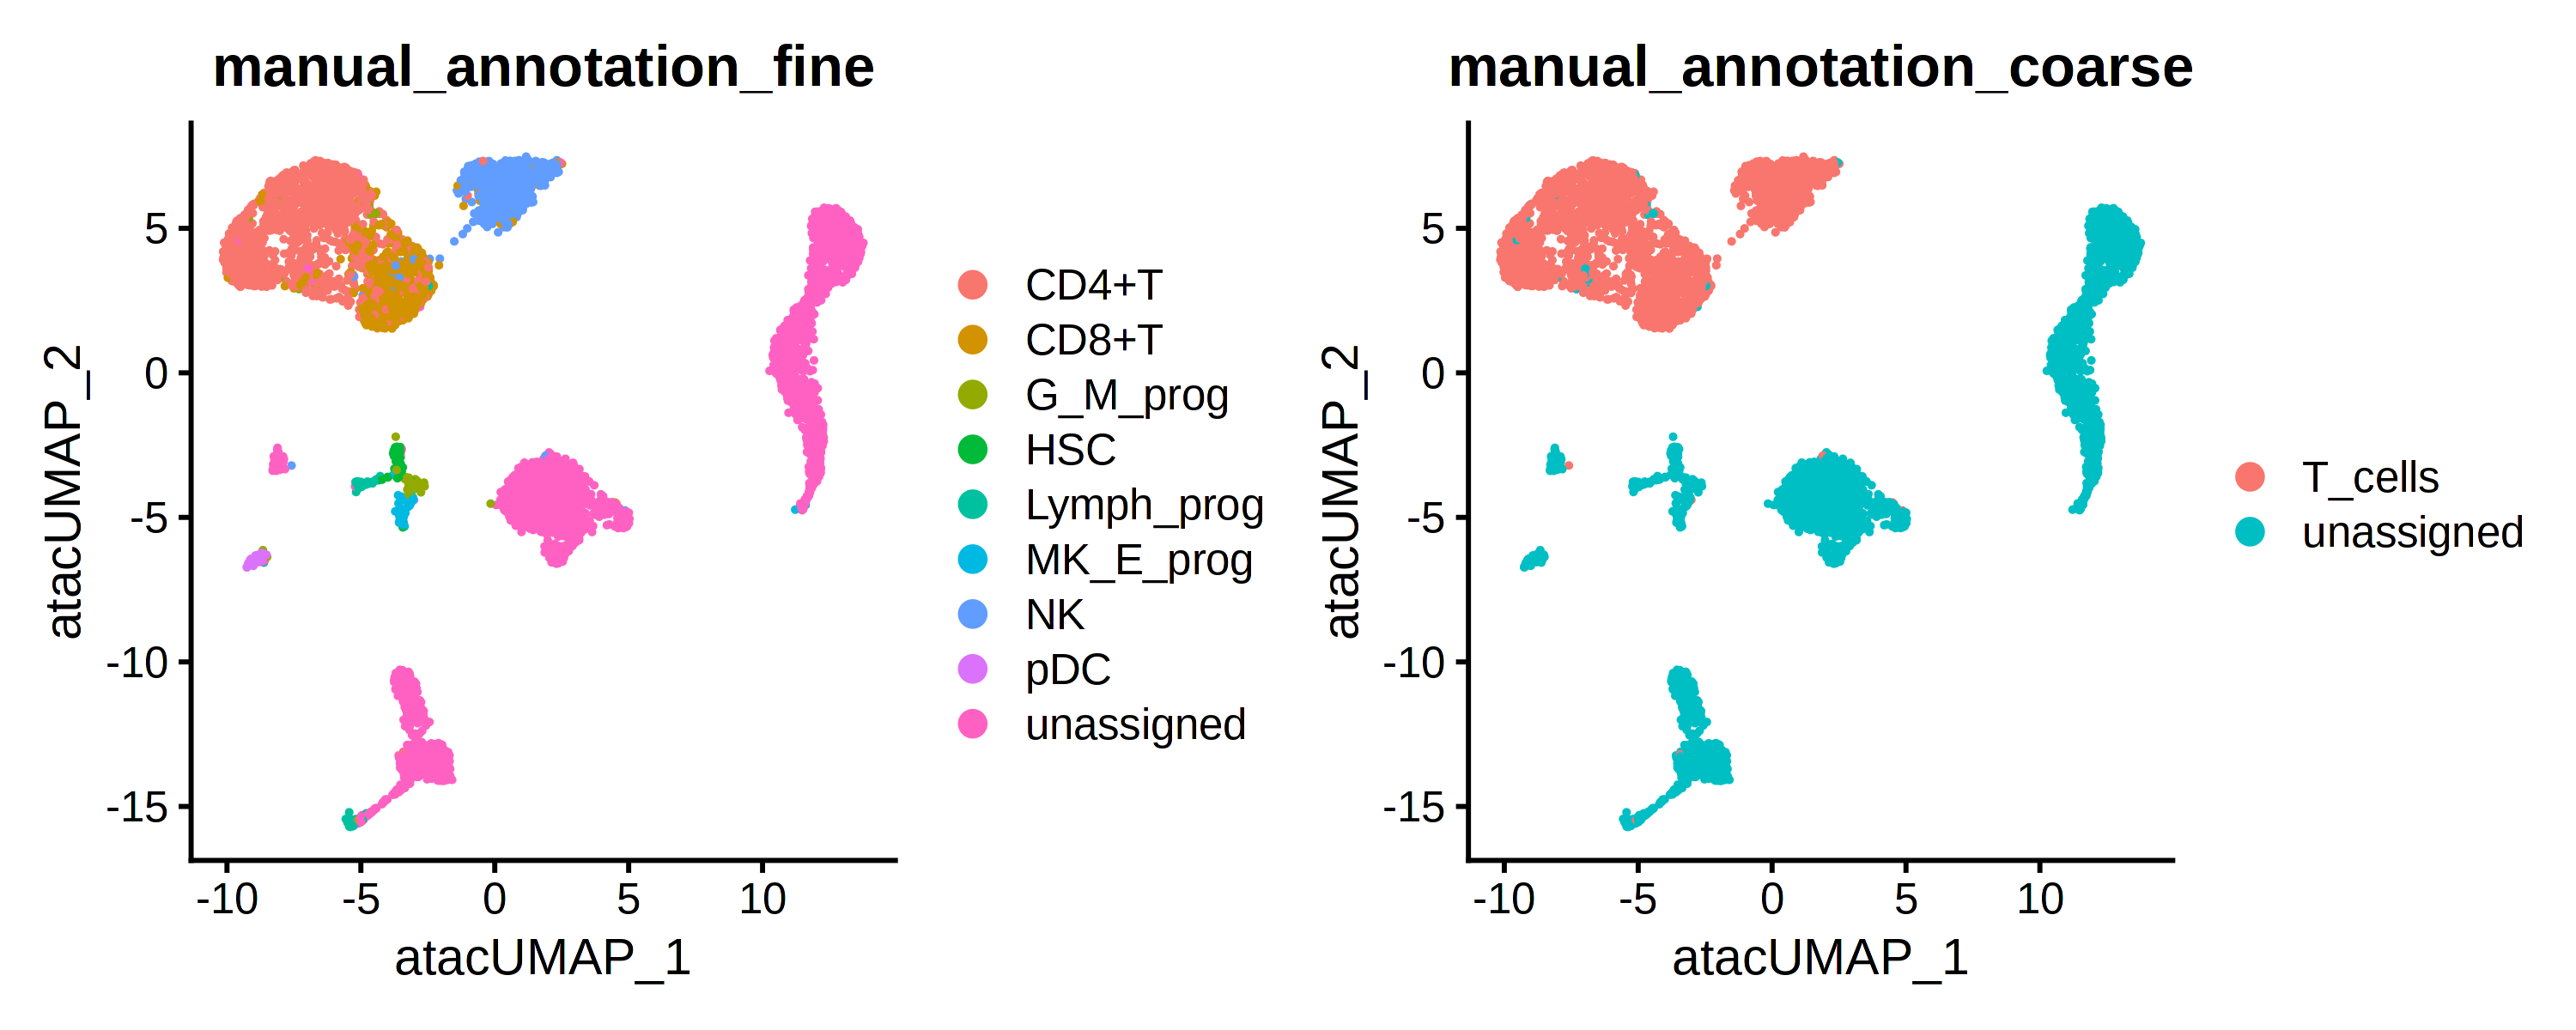

In [33]:
options(repr.plot.width=10, repr.plot.height=4)


DimPlot(pbmc, group.by = c('manual_annotation_fine', 'manual_annotation_coarse') ) 



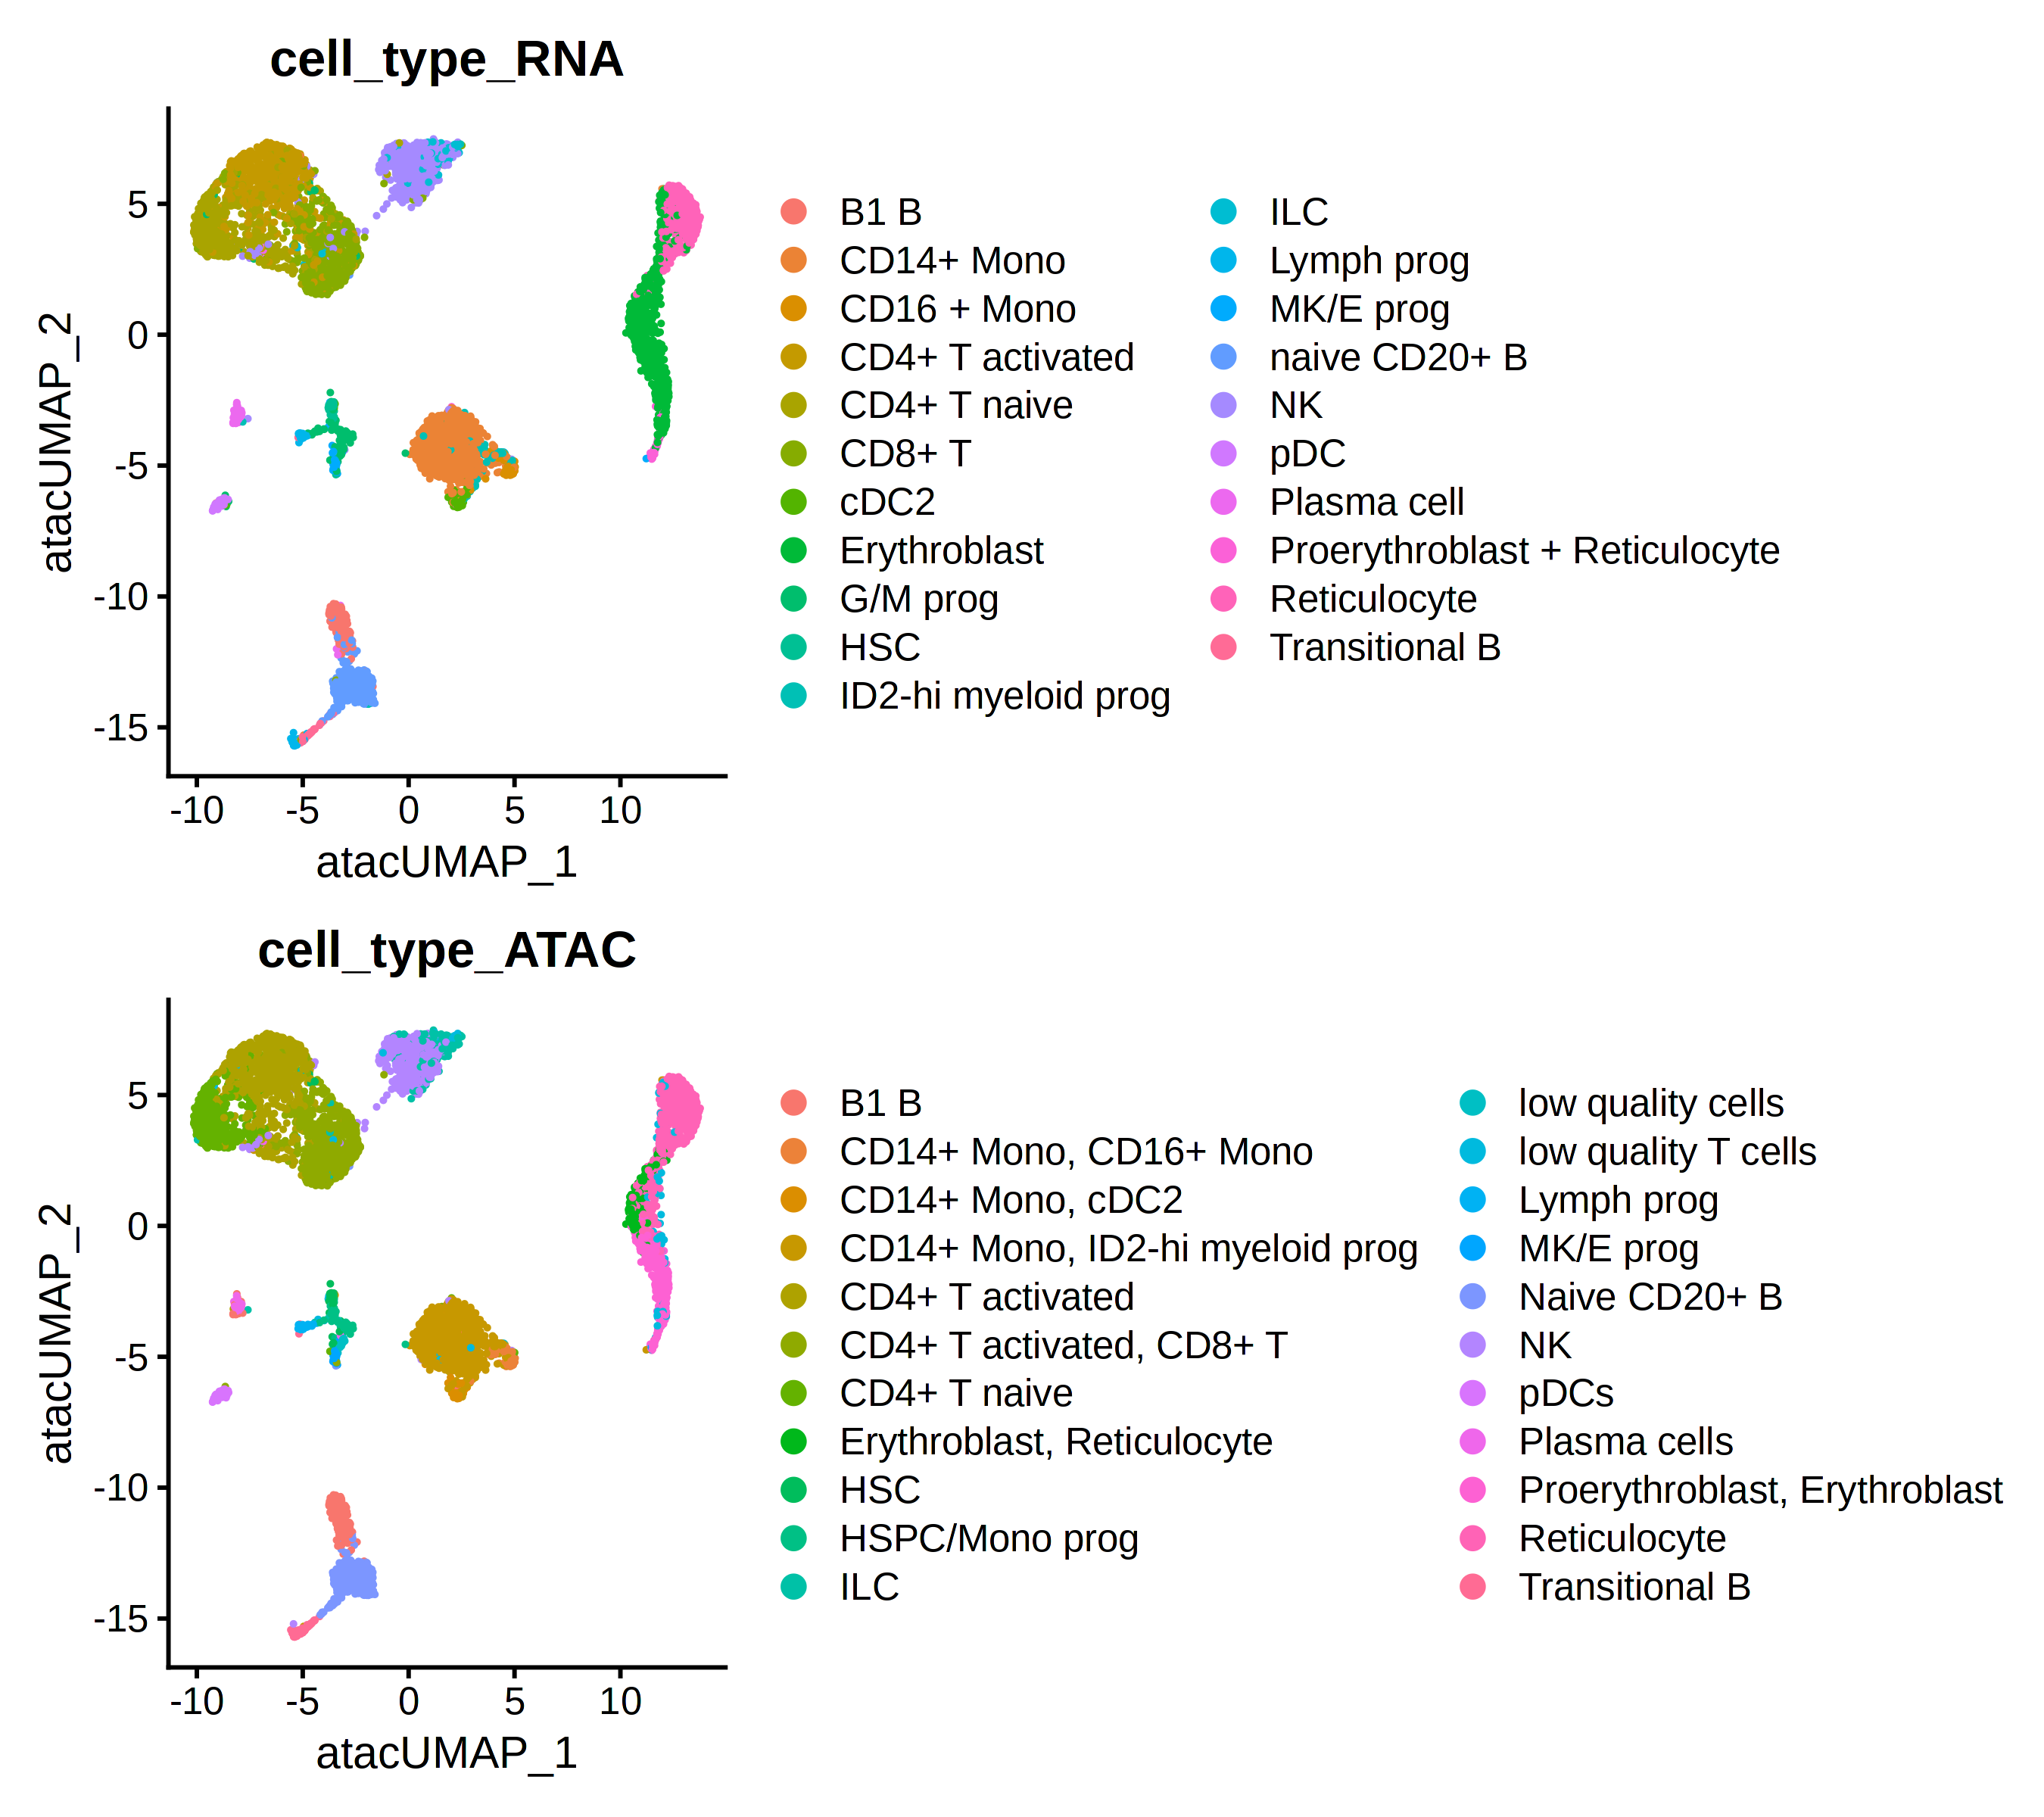

In [34]:

options(repr.plot.width=9, repr.plot.height=8)


DimPlot(pbmc, group.by = c('cell_type_RNA', 'cell_type_ATAC') ,ncol = 1) 


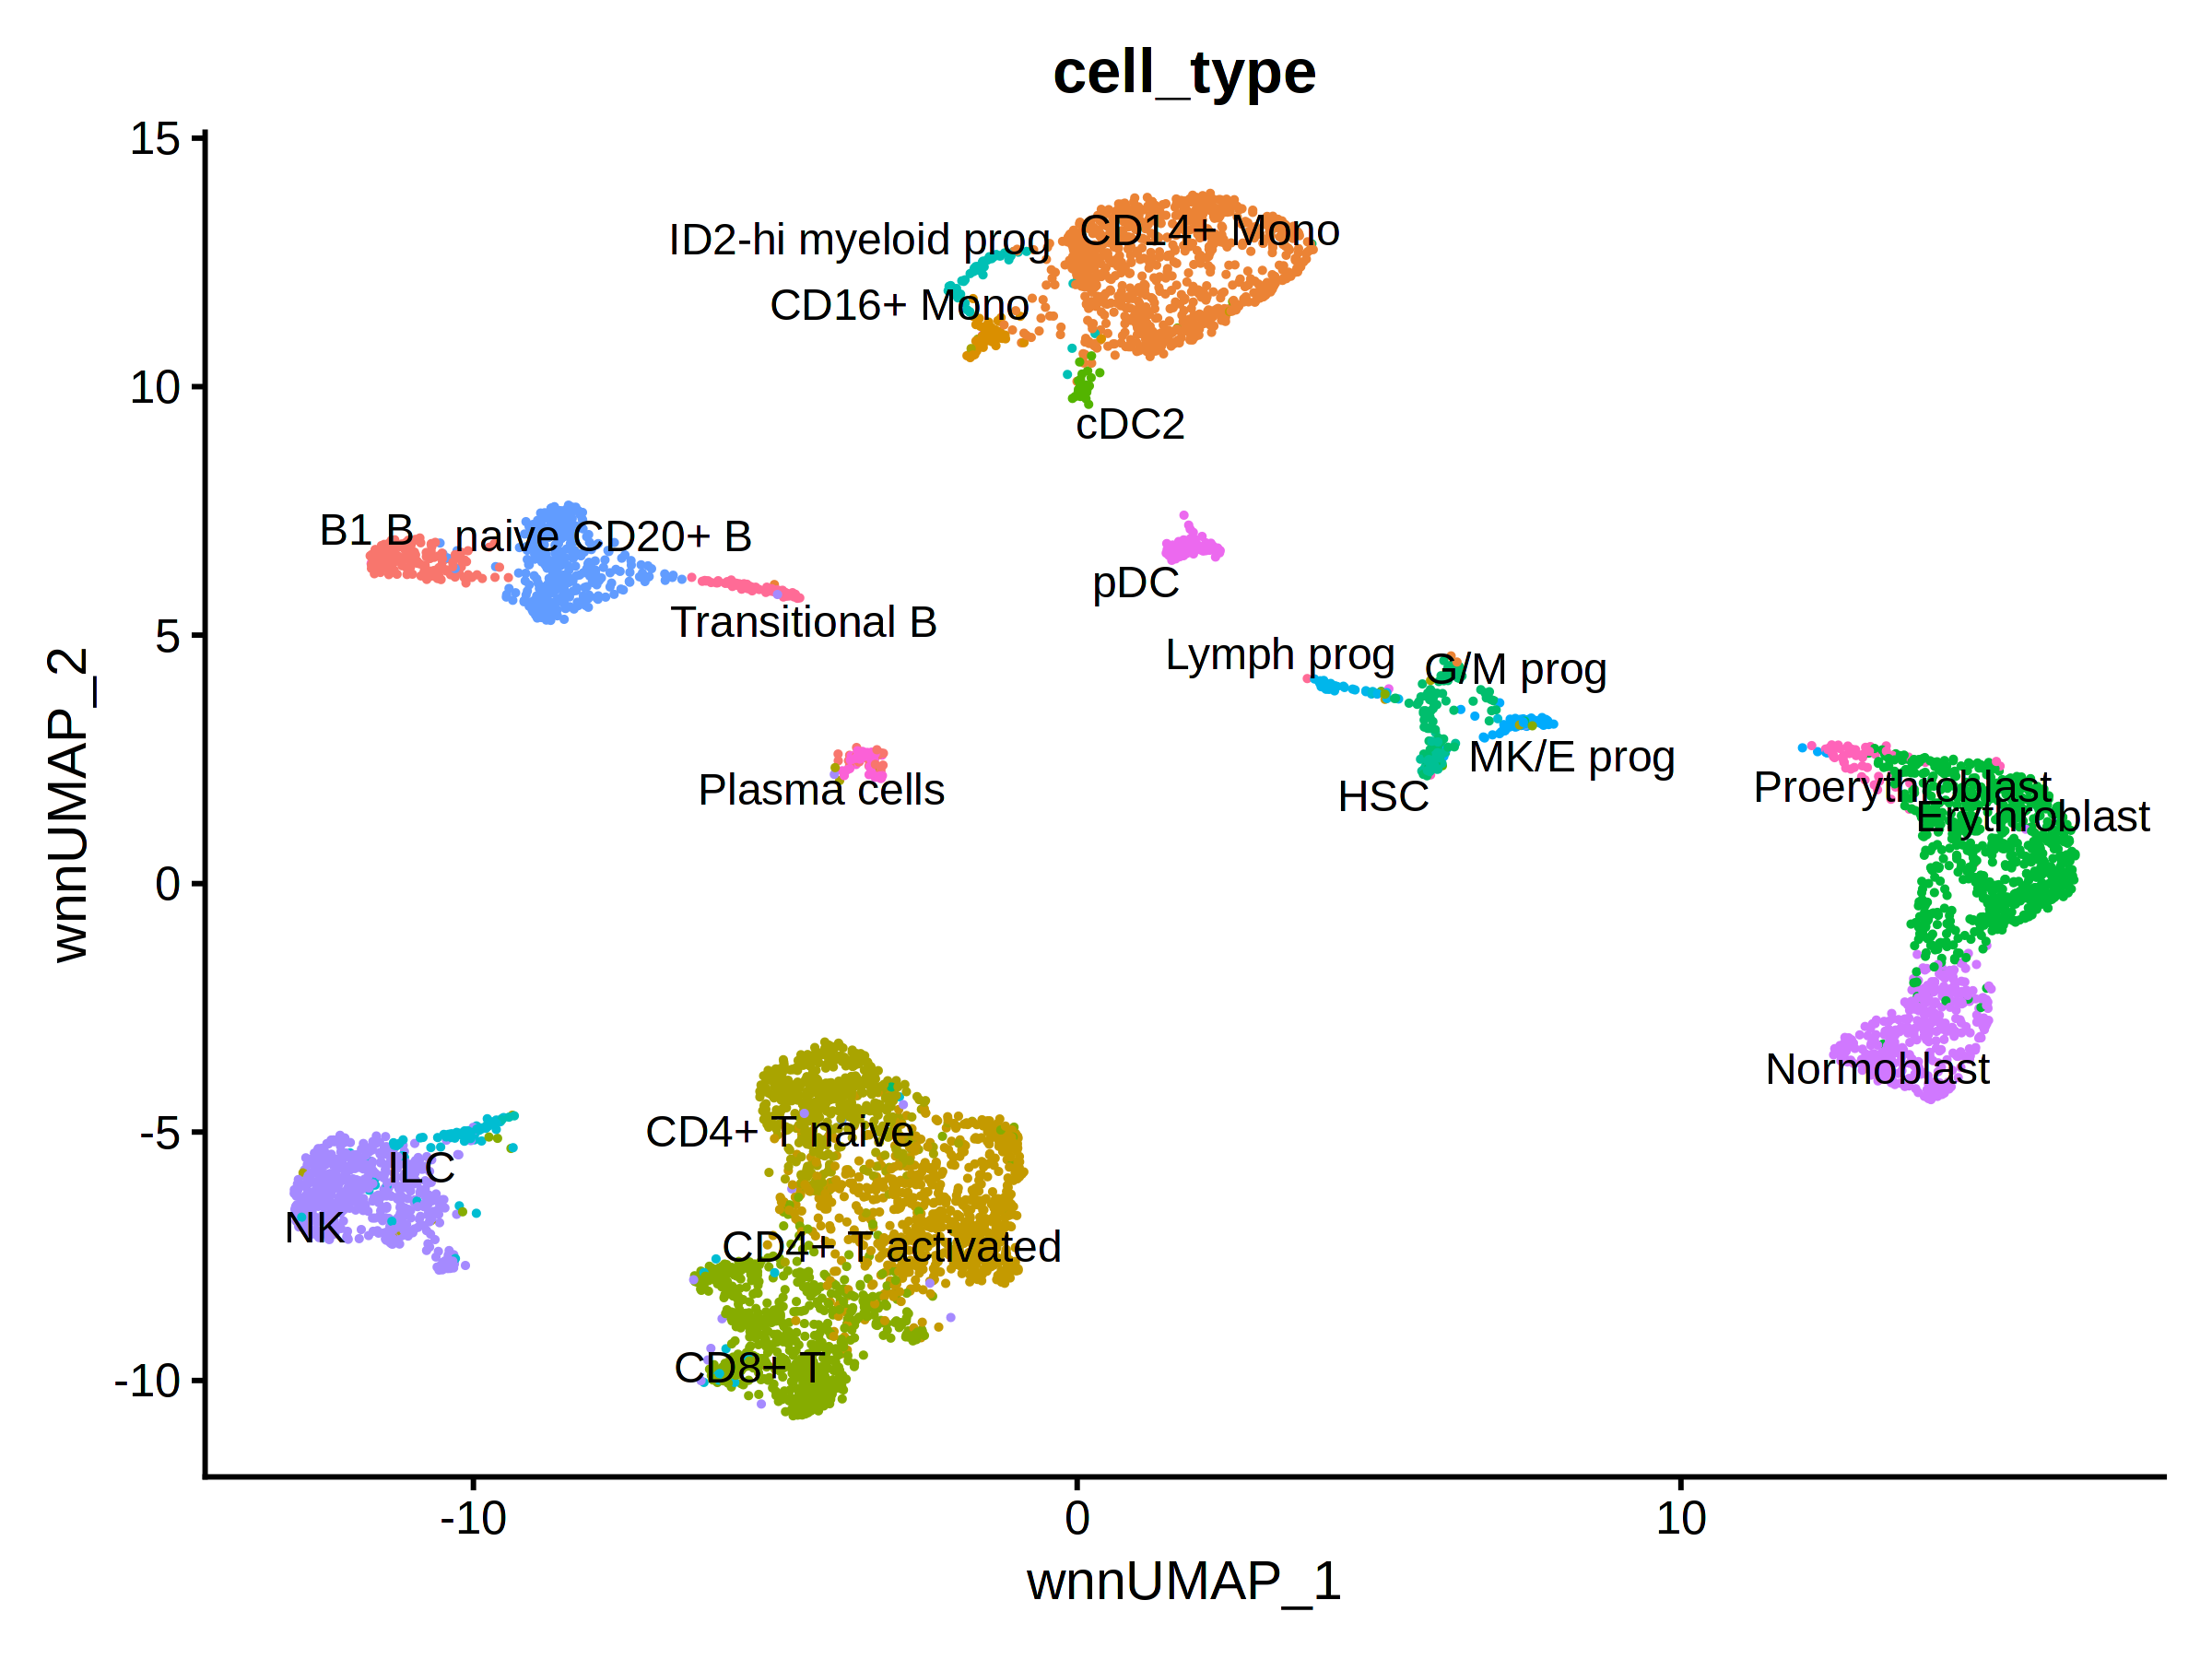

In [36]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(pbmc, group.by = c('cell_type') ,
        reduction="wnn.umap", ncol = 1, 
        label=TRUE, repel=TRUE) +  NoLegend() 


In [37]:
wnn.umap <- pbmc@reductions$wnn.umap


In [38]:
# save the Seurat object
saveRDS(pbmc, "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_wnn_seurat.rds", 
        )

# Convert the Seurat object to h5ad object

In [39]:
library(SeuratDisk)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [41]:
# Make sure that we have the raw counts in the @x field
# Note that this should be checked manually for now, but we can think of adding a unit test for this (whether the sum is integer or not.)
pbmc@assays$RNA@data@x <- pbmc@assays$RNA@counts@x

# Set the directory to the output_dir where we will save the h5 and h5ad files
output_dir = "/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/"
setwd(output_dir)

# Save as seurat h5
# RNA object
SaveH5Seurat(pbmc, filename = '/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_wnn_seurat.h5Seurat')

#convert to h5ad, writes to disk
Convert("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/neurips2021_multiome/s1d1_rna_atac_wnn_seurat.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for ATAC

Adding data for ATAC

Adding variable features for ATAC

Adding feature-level metadata for ATAC

Writing out ranges for ATAC

Writing out motifs for ATAC

Writing out fragments for ATAC

Writing out seqinfo for ATAC

Writing out annotation for ATAC

Writing out bias for ATAC

Writing out positionEnrichment for ATAC

Writing out links for ATAC

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

Adding variable features for SCT

No feature-level metadata found for SCT

Writing out SCTModel.list for SCT

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap.rna

No loadings for umap.rna

No projected loadings for umap.rna

No standard deviations for umap